<a href="https://colab.research.google.com/github/Gaoqiaoxinye/novel_file/blob/main/Machine_learning_concise_pipeline_0506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The default PATH of colab is "/content", and after mounting to MyDrive, the folder is under current directory.

In [1]:
import os
current_path = os.getcwd()
print(current_path)

/content


In [101]:
import pandas as pd

# Assuming the correct path to your file
file_path = '/content/drive/MyDrive/Datasets/raw_data.xlsx'
raw_data = pd.read_excel(file_path)
# try:
#     # Read the Excel file
#     df = pd.read_excel(file_path)
#     # Continue with your data processing
#     # ...
# except FileNotFoundError as e:
#     print(f"FileNotFoundError: {e}")


In [120]:
# raw_data = df
df = raw_data

In [5]:
!pip install --upgrade scikit-learn

In [121]:
import pandas as pd
import numpy as np
from sympy.printing.tensorflow import tensorflow
import os
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# base_dir = r'C:\Users\Administrator\Desktop\Projects_files'
# df_Matrix_path = os.path.join(base_dir, 'Matrix.xlsx')
# df_raw_path = os.path.join(base_dir, 'Raw_Children_DATA_1.xlsx')

# import dataframes
# df_bacterial = pd.read_excel('Matrix.xlsx',sheet_name='Bacteria_only',usecols=['Patient_ID','affection_type'])
# df_raw = pd.read_excel('Raw_Children_DATA_1.xlsx', sheet_name='Raw')

# Merge based on column 'Patient_ID'
# df_bacterial_merged = pd.merge(df_bacterial, df_raw, on='Patient_ID', how='right')  # You can choose 'inner', 'outer', 'left', or 'right'
# A left join returns all rows from the left DataFrame and matching rows from the right DataFrame, and vice versa.

# df_raw_merged = (df_bacterial_merged.iloc[:,[1]+list(range(5,7))+list(range(29,282))])

target_names = ["non-severe pneumonia","severe pneumonia"]
# target_names = ["non pneumonia", "pneumonia"]
# target_names = ['bacterial_affection', 'non_bacterial_affection']

# Select the project subjects for the following analysis.

print(f"The names of the processed targets are: {target_names}")
print("The pipeline is goining to be run...\n")
random_state = 42
TV_ratio = 0.8 # the ratio of training cohort
print(f"The random state is: {random_state}\n")
print(f"The training cohort accounts for {TV_ratio}\n")



# IMPORT DATAFRAME AND PREPROCESSES
# df = df.iloc[:,1:] # remove the column title being "Patient_ID"
df = df.dropna(axis=1, how="all")
# Trimming out redundant columns
# df = df[df["pneumonia"]==1] # Set the label column, filtering the patients with 'pneumonia'
# columns_to_drop = ['pneumonia',"severe_pneumonia"]
# df.drop(columns=columns_to_drop, inplace=True)
# df['affection_type'].replace(2, 1, inplace=True)
missing_percent_column =df.isnull().mean() # calculate the percent of missing values for each column

nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
# dump_formula.drop(cols_to_drop, axis=1, inplace=True)
cutoff_column = 0.75 # set the cutoffs
columns_to_drop = missing_percent_column[missing_percent_column >cutoff_column].index

scikit-learn version: 1.4.2
The names of the processed targets are: ['non-severe pneumonia', 'severe pneumonia']
The pipeline is goining to be run...

The random state is: 42

The training cohort accounts for 0.8



In [89]:
df['age'].value_counts()

age
0     2441
6      821
3      767
1      728
4      707
5      684
7      650
2      639
8      541
9      532
10     474
12     375
11     375
13     327
14      24
Name: count, dtype: int64

In [111]:
df.iloc[:,32]

0        10.5
1        28.9
2        44.9
3         NaN
4        14.5
         ... 
10080     8.8
10081    33.8
10082    33.2
10083    13.0
10084    16.0
Name: CB_1, Length: 10085, dtype: float64

In [105]:
import pandas as pd

# Convert the index to a DataFrame
index_df = pd.DataFrame(df.columns, columns=["Column_Name"])

# Save to CSV without the index
index_df.to_csv("index.csv", index=False)


In [122]:
cutoff_row = 0.75
missing_percent_row =df.isnull().mean(axis=1) # calculate the percent of missing values for each column
df = df[missing_percent_row <= cutoff_row] # filter rows based on the cutoff
# Processing missing values
# The fit_transform method combines two steps: fit: It learns about the data (e.g., computes mean, median, etc.) based on the non-missing values; transform: It applies the learned information to fill in the missing values.
imputer = SimpleImputer(strategy='mean') # Handle NaN values using imputation, with the preliminary condition being that all labels are valid
df.iloc[:,32:]  = imputer.fit_transform(df.iloc[:,32:])# The first two columns are of "pneumonia" and "severe pneumonia", respectively, so they are all labels.
df = pd.DataFrame(df, columns=df.columns) # Tips: the returned values of .fit_transform is a Numpy array, not a pandas DataFrame
# Preprocess the data (scaling)
scaler = StandardScaler()  # Create an instance of the StandardScaler class.
df.iloc[:, 32:] = scaler.fit_transform(df.iloc[:, 32:])  # Fit the scaler to the data and then transform it, then it can be effectively used in machine learning models by giving each feature a mean of 0 and a variance of 1, which helps in speeding up the convergence of learning algorithms.
print(f"The imputed and scaled dataframe has been fabricated!")

The imputed and scaled dataframe has been fabricated!


In [123]:
# df_preservation = df
df = df_preservation

In [10]:
!pip install imbalanced-learn==0.9.0

In [124]:
# Separate column selections
data_X = df.iloc[:, 32:]
# data_y_HD = df.iloc[:, 5]
# data_y_PICU = df.iloc[:,8]
# data_y_PICU_duration = df.iloc[:,7]
# data_y_cost = df.iloc[:,10]
data_y_pneumonia = df.iloc[:,11]
# data_y_severity = df.iloc[:,12]
df = pd.concat([data_X, data_y_pneumonia], axis=1)
# Concatenate the selected columns

In [125]:
df.columns

Index(['CB_1', 'CB_2', 'CB_3', 'CB_4', 'CB_5', 'CB_6', 'CB_8', 'CB_9', 'CB_10',
       'CB_11', 'CB_13', 'CB_14', 'CB_15', 'CB_16', 'CB_17', 'CB_22', 'CB_23',
       'CB_24', 'CB_25', 'CB_26', 'CB_27', 'CB_28', 'CB_29', 'CB_30', 'CB_31',
       'CB_32', 'CB_33', 'CB_34', 'CB_35', 'CB_36', 'CB_37', 'CB_43', 'CB_44',
       'BR_1', 'BR_2', 'BR_3', 'BR_4', 'BR_5', 'BR_6', 'BR_7', 'BR_8', 'BR_9',
       'BR_10', 'BR_11', 'BR_12', 'BR_13', 'BR_14', 'BR_15', 'BR_16', 'BR_17',
       'BR_18', 'BR_19', 'BR_20', 'BR_21', 'BR_22', 'BR_23', 'BR_24', 'BR_25',
       'BR_26', 'BR_27', 'BR_28', 'BR_29', 'BR_31', 'BG_1', 'BG_2', 'BG_3',
       'BG_4', 'BG_5', 'BG_6', 'BG_7', 'pneumonia'],
      dtype='object')

In [74]:
df = df[(df['pneumonia']==1)&(df['PICU']==1)]
df.drop(['pneumonia','PICU'],axis=1, inplace=True)

<ipython-input-74-c22a347dd167>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['pneumonia','PICU'],axis=1, inplace=True)


In [126]:
df

,CB_1,CB_2,CB_3,CB_4,CB_5,CB_6,CB_8,CB_9,CB_10,CB_11,...,BR_29,BR_31,BG_1,BG_2,BG_3,BG_4,BG_5,BG_6,BG_7,pneumonia
0,-0.209457,0.267463,9.054815e-01,2.412295,0.531936,2.489521,-1.063772e+00,-0.585842,-1.056412,0.660912,...,2.693746e-16,5.601247e-01,-1.758906,-9.074135e-01,-1.875868e+00,-3.743537e-14,-2.047827e+00,1.493403e-14,-1.523359e-01,0
1,0.102002,-0.271757,-8.179815e-01,-0.480254,-0.433239,-0.460971,2.326524e+00,0.900512,2.636806,-1.322839,...,2.693746e-16,2.390073e-16,0.000000,-6.305120e-16,1.552908e-16,-3.743537e-14,-1.191511e-15,1.493403e-14,2.949775e-15,0
2,0.372836,0.112834,-7.727354e-01,-0.451051,-0.234076,-0.451239,4.992866e-01,1.314433,-0.395181,0.677040,...,2.693746e-16,2.390073e-16,-0.632876,2.461633e-01,-4.771325e-01,-3.743537e-14,-7.063055e-01,1.493403e-14,4.703800e-01,1
3,0.000000,0.000000,-1.826662e-16,0.000000,0.000000,0.000000,-7.821267e-16,0.000000,0.000000,0.000000,...,2.693746e-16,2.390073e-16,0.000000,-6.305120e-16,1.552908e-16,-3.743537e-14,-1.191511e-15,1.493403e-14,2.949775e-15,0
4,-0.141748,-0.345107,-5.506185e-01,-0.415702,-0.249396,-0.412310,7.414506e-01,-0.059033,1.136940,-1.000278,...,-1.067603e+00,2.390073e-16,-0.987652,-2.004671e-02,-1.875868e+00,-3.743537e-14,-1.712447e+00,1.493403e-14,4.703800e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10080,-0.238233,-0.309423,-5.291201e-02,-0.469495,-0.479200,-0.444751,-2.492204e-01,-0.454140,0.024136,-0.468052,...,2.693746e-16,6.343048e+00,0.000000,-6.305120e-16,1.552908e-16,-3.743537e-14,-1.191511e-15,1.493403e-14,2.949775e-15,0
10081,0.184945,0.376496,-4.724662e-01,-0.514067,-0.463880,-0.493412,-1.360973e+00,-2.636635,0.266050,-1.435735,...,2.693746e-16,2.390073e-16,0.000000,-6.305120e-16,1.552908e-16,-3.743537e-14,-1.191511e-15,1.493403e-14,2.949775e-15,0
10082,0.174789,-0.301494,-8.837939e-01,-0.471032,-0.540481,-0.439885,2.150405e+00,0.712366,2.540040,-1.338967,...,2.693746e-16,2.390073e-16,0.000000,-6.305120e-16,1.552908e-16,-3.743537e-14,-1.191511e-15,1.493403e-14,2.949775e-15,0
10083,-0.167139,-0.289599,-3.902007e-01,-0.467958,-0.494520,-0.441507,1.688092e+00,0.185557,2.314254,-1.387351,...,2.693746e-16,2.390073e-16,0.000000,-6.305120e-16,1.552908e-16,-3.743537e-14,-1.191511e-15,1.493403e-14,2.949775e-15,0


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# df_training, df_validation = train_test_split(df, test_size=1-TV_ratio, random_state=random_state) # Split the DataFrame into training (80%) and validation (20%) cohorts # Before the training finished, the default random state is set as 42.

# # Assuming X_train, X_test, y_train, y_test are defined
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)

# # Print MSE
# print(f'Mean Squared Error: {mse}')

# # Since Linear Regression does not have probabilities, we cannot compute ROC curve and AUC
# # Instead, we'll evaluate the model using evaluation metrics and draw the confusion matrix

# # Define a threshold for converting predicted probabilities to binary labels
# threshold = 0.5  # Example threshold, adjust as needed

# # Convert predicted probabilities to binary labels based on the threshold
# y_pred_binary = (y_pred >= threshold).astype(int)

# # Calculate evaluation metrics
# f1 = f1_score(y_test, y_pred_binary)
# accuracy = accuracy_score(y_test, y_pred_binary)
# precision = precision_score(y_test, y_pred_binary)
# recall = recall_score(y_test, y_pred_binary)

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred_binary)

# # Calculate specificity
# tn, fp, fn, tp = cm.ravel()
# specificity = tn / (tn + fp)

# # Print evaluation metrics
# print(f'F1 Score: {f1}')
# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'Specificity: {specificity}')

# # Draw confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()


Selected features based on Pearson Correlation: ['CB_36']


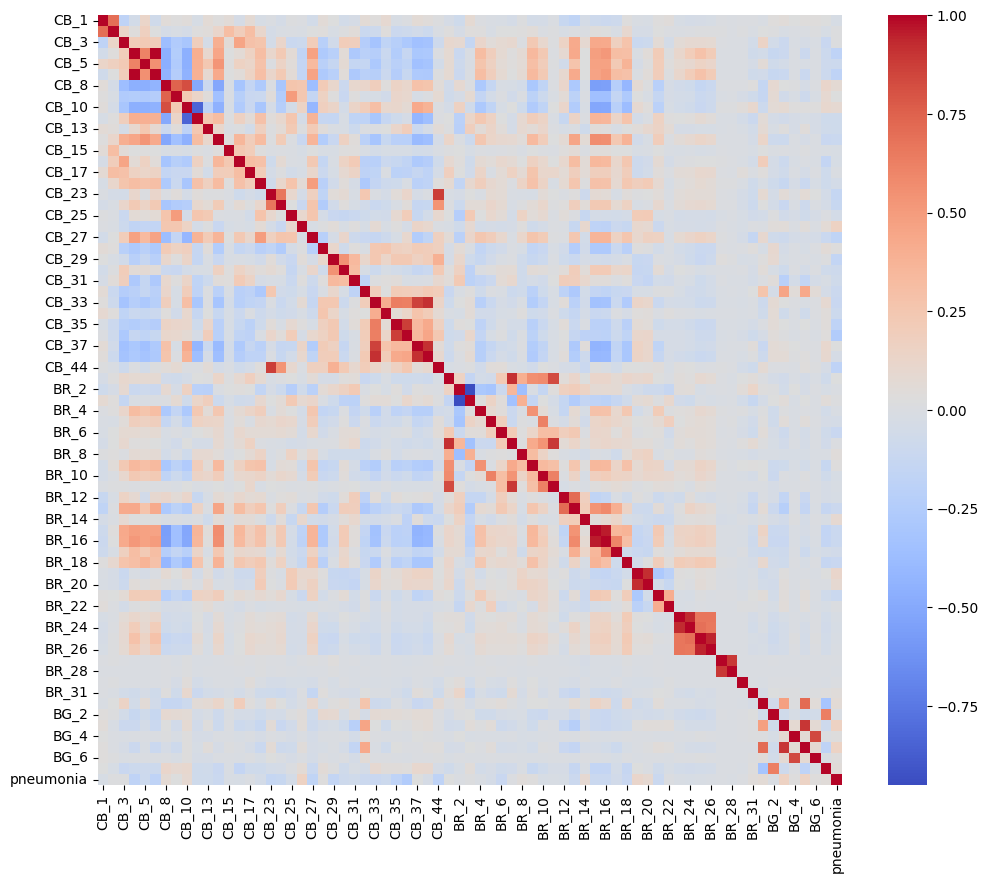

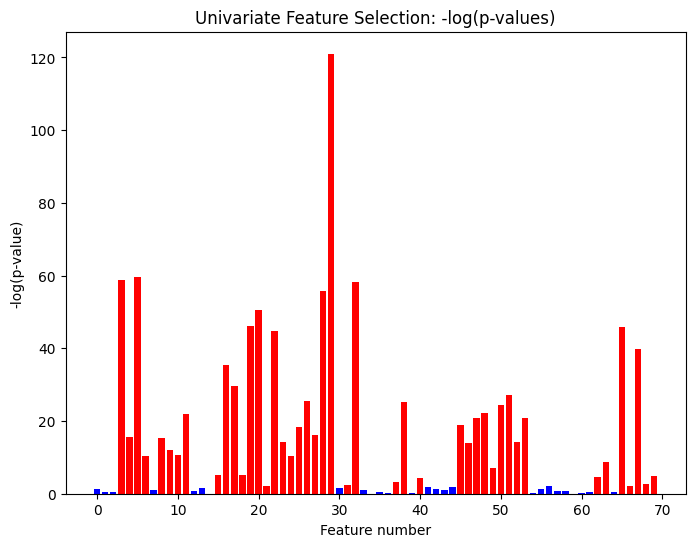

Selected features with -log(p-value) > 2:
['CB_4', 'CB_5', 'CB_6', 'CB_8', 'CB_10', 'CB_11', 'CB_13', 'CB_14', 'CB_22', 'CB_23', 'CB_24', 'CB_25', 'CB_26', 'CB_27', 'CB_28', 'CB_29', 'CB_30', 'CB_31', 'CB_32', 'CB_33', 'CB_34', 'CB_35', 'CB_36', 'CB_43', 'CB_44', 'BR_5', 'BR_6', 'BR_8', 'BR_13', 'BR_14', 'BR_15', 'BR_16', 'BR_17', 'BR_18', 'BR_19', 'BR_20', 'BR_21', 'BR_31', 'BG_1', 'BG_3', 'BG_4', 'BG_5', 'BG_6', 'BG_7']
The selected freatures are as follows: 
0     CB_36
1      CB_4
2      CB_5
3      CB_6
4      CB_8
5     CB_10
6     CB_11
7     CB_13
8     CB_14
9     CB_22
10    CB_23
11    CB_24
12    CB_25
13    CB_26
14    CB_27
15    CB_28
16    CB_29
17    CB_30
18    CB_31
19    CB_32
20    CB_33
21    CB_34
22    CB_35
24    CB_43
25    CB_44
26     BR_5
27     BR_6
28     BR_8
29    BR_13
30    BR_14
31    BR_15
32    BR_16
33    BR_17
34    BR_18
35    BR_19
36    BR_20
37    BR_21
38    BR_31
39     BG_1
40     BG_3
41     BG_4
42     BG_5
43     BG_6
44     BG_7
dtype:

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

# THE CONFIGURATION OF THE TRAINING AND VALIDATION COHORT
TV_ratio = 0.2  # Validation ratio
random_state = 42  # Random state for reproducibility

# Split the DataFrame into training and validation cohorts
df_training, df_validation = train_test_split(df, test_size=TV_ratio, random_state=random_state)

# Calculate the Pearson correlation coefficients
correlation_matrix = df_training.corr()

# Set a threshold for selecting features
threshold = 0.25
target_correlation = correlation_matrix.iloc[:-1, -1].abs()
selected_features_1 = target_correlation[target_correlation > threshold].index.tolist()
print(f"Selected features based on Pearson Correlation: {selected_features_1}")

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Perform t-test for each feature
t_scores = []
p_values = []
for feature in df_training.columns[:-1]:
    t_score, p_value = ttest_ind(df_training[df_training['pneumonia'] == 0][feature],
                                  df_training[df_training['pneumonia'] == 1][feature])
    t_scores.append(t_score)
    p_values.append(p_value)

# Convert p-values to -log(p-values)
neg_log_p_values = -np.log10(p_values)

# Plot feature scores
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(neg_log_p_values)), neg_log_p_values, color=np.where(neg_log_p_values > 2, 'red', 'blue'))
plt.title("Univariate Feature Selection: -log(p-values)")
plt.xlabel("Feature number")
plt.ylabel("-log(p-value)")
plt.show()

# Select features where -log(p-value) > 2
selected_features_2 = df_training.columns[:-1][neg_log_p_values > 2].tolist()
print("Selected features with -log(p-value) > 2:")
print(selected_features_2)

# # Univariate feature selection using F-test
# selector1 = SelectKBest(f_classif, k='all')
# selector1.fit(df_training.iloc[:, :-1], df_training.iloc[:, -1])
# scores = -np.log10(selector1.pvalues_)

# # Filter features where -log(p-value) > 2
# selected_features = df_training.columns[:-1][scores > 2].tolist()

# # Show the list of -log(p-values) for each feature
# feature_scores = pd.DataFrame({'Feature': df_training.columns[:-1], '-log(p-value)': scores})
# print("List of -log(p-values) for each feature:")
# print(feature_scores)

# # Show top 10 features where -log(p-value) > 2
# top_features = feature_scores[feature_scores['-log(p-value)'] > 2].nlargest(10, '-log(p-value)')
# print("\nTop 10 features with -log(p-value) > 2:")
# print(top_features)

# Extract the feature names from the DataFrame and convert to a list
# selected_features_2 = top_features['Feature'].tolist()


# # Univariate feature selection using F-test
# selector1 = SelectKBest(f_classif, k='all')
# selector1.fit(df_training.iloc[:, :-1], df_training.iloc[:, -1])
# scores = -np.log10(selector1.pvalues_ ) # / (-np.log10(selector1.pvalues_ + 1e-10)).max()

# Plot feature scores
# plt.figure(figsize=(8, 6))
# bars = plt.bar(np.arange(len(scores)), scores, width=0.2, color=np.where(scores >2, 'red', 'blue'))
# plt.title("Univariate Feature Selection: Feature Scores")
# plt.xlabel("Feature number")
# plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
# plt.ylim(0, (-np.log10(selector1.pvalues_)).max())  # Set the y-axis limits
# plt.show()

# # Extract features with scores higher than the threshold
# selected_features_2 = df_training.columns[:-1][scores > 1.301].tolist()
# print(f"Univariate feature selction Significant Features: {list(selected_features_2)}")

# Combine selected features
selected_features = pd.Series(selected_features_1 + selected_features_2).drop_duplicates()

# Extract features and labels
X = df_training[selected_features]
X_val = df_validation[selected_features]
y = df_training.iloc[:, -1]
y_val = df_validation.iloc[:, -1]
X_nn = df_training.iloc[:, :-1]
y_nn = df_training.iloc[:, -1]
X_val_nn = df_validation.iloc[:, :-1]
y_val_nn = df_validation.iloc[:, -1]

# Assuming 'selected_features' is a Series
n = len(selected_features)
num_groups = 5
group_size = n // num_groups

# # Create a list to hold the groups
# groups = []

# # Split the series into groups and add them to the list
# for i in range(num_groups):
#     start_idx = i * group_size
#     # For the last group, make sure to include all remaining elements
#     end_idx = n if i == num_groups - 1 else (i + 1) * group_size
#     group = selected_features.iloc[start_idx:end_idx]
#     groups.append(group)

print(f"The selected freatures are as follows: \n{selected_features}.")
print("Feature selection and extraction completed.")


In [158]:
selected_features

0     CB_36
2      CB_6
3      CB_4
4     CB_44
5     CB_35
6     CB_27
7     CB_26
8      BG_3
9     CB_29
10     BG_5
dtype: object

Selected features based on Pearson Correlation: []


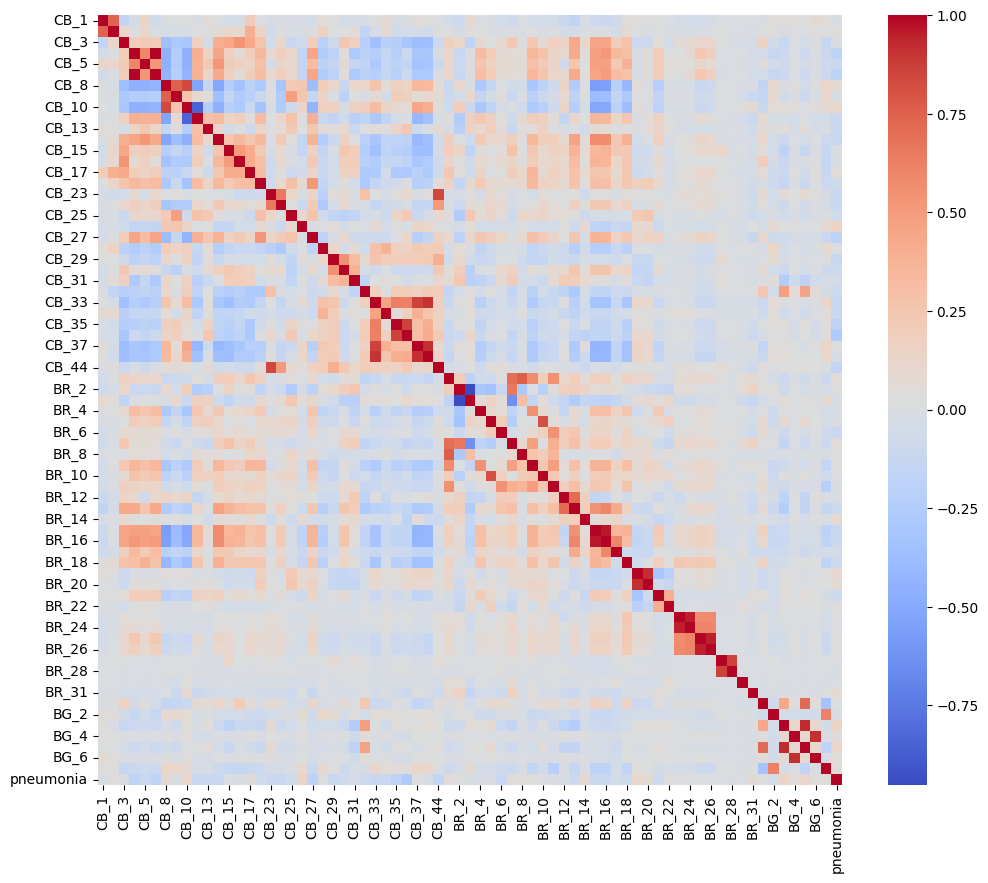

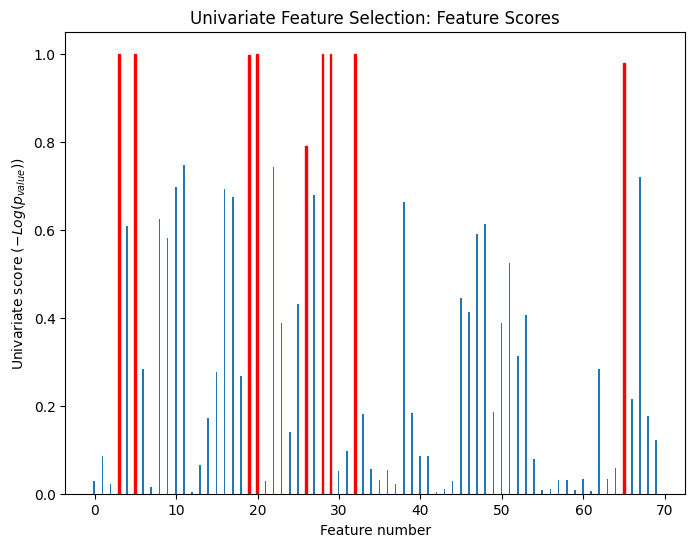

Index to the Top 10 Significant Features: [3, 5, 11, 19, 20, 26, 28, 29, 32, 65]
Top 10 Significant Features: ['CB_4', 'CB_6', 'CB_14', 'CB_26', 'CB_27', 'CB_33', 'CB_35', 'CB_36', 'CB_44', 'BG_3']
The selected freatures are as follows: 
0     CB_4
1     CB_6
2    CB_14
3    CB_26
4    CB_27
5    CB_33
6    CB_35
7    CB_36
8    CB_44
9     BG_3
dtype: object.
All features and labels have been extracted from the raw dataframe!



In [159]:
# # THE CONFIGURATION OF THE TRAINING AND VALIDATION COHORT
# df_training, df_validation = train_test_split(df, test_size=1-TV_ratio, random_state=random_state) # Split the DataFrame into training (80%) and validation (20%) cohorts # Before the training finished, the default random state is set as 42.

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'df' is your DataFrame with the last column as the target variable
# # X = df.iloc[:, :-1]  # Features
# # y = df.iloc[:, -1]   # Target variable

# # Calculate the Pearson correlation coefficients
# correlation_matrix = df_training.corr()

# # Select the correlations of features with the target variable
# target_correlation = correlation_matrix.iloc[:-1, -1] # .abs()

# # Set a threshold for selecting features (e.g., 0.5)
# threshold = 0.25
# selected_features_1 = target_correlation[target_correlation > threshold].index.tolist()

# # Print the selected features
# print(f"Selected features based on Pearson Correlation: {selected_features_1}")

# # Visualize the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
# plt.show()

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.feature_selection import SelectKBest, f_classif

# # Assuming 'df_training' is your DataFrame and 'pneumonia' is the target column
# # Make sure 'df_training' is defined and 'pneumonia' is a column in it.

# # Univariate feature selection using F-test
# selector1 = SelectKBest(f_classif, k='all')  # Use 'all' to select all features
# X = df_training.iloc[:,:-1]
# y = df_training.iloc[:,-1]
# selector1.fit(X, y)
# p_values = selector1.pvalues_
# # Handle zero p-values by adding a small constant
# p_values += 1e-10
# scores = -np.log10(p_values)
# scores /= scores.max()
# feature_names = X.columns

# # Define a threshold above which we will highlight bars in red
# threshold = 0.75  # Example threshold

# # Plot feature scores
# X_indices = np.arange(X.shape[-1])
# plt.figure(figsize=(8, 6))
# bars = plt.bar(X_indices - 0.05, scores, width=0.2)

# # Highlight bars above the threshold in red
# for i, bar in enumerate(bars):
#     if scores[i] > threshold:
#         bar.set_color('red')

# plt.title("Univariate Feature Selection: Feature Scores")
# plt.xlabel("Feature number")
# plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
# plt.show()

# # Univariate feature selection using F-test
# selector2 = SelectKBest(f_classif, k=10)
# selector2.fit(X, y)

# # Get the p-values for the feature scores
# p_values = selector2.pvalues_
# # Handle zero p-values by adding a small constant
# p_values += 1e-10
# scores = -np.log10(p_values)
# scores /= scores.max()

# # Print selected features
# selected_features_2 = feature_names[selector2.get_support()]
# selected_features_numeric = np.array(X_indices)[selector2.get_support()]
# print(f"Index to the Top 10 Significant Features: {list(selected_features_numeric)}")
# print(f"Top 10 Significant Features: {list(selected_features_2)}")

# # Convert lists to Pandas Series
# selected_features_1_series = pd.Series(selected_features_1)
# selected_features_2_series = pd.Series(selected_features_2)
# selected_features = pd.concat([selected_features_1_series,selected_features_2_series])
# selected_features = selected_features.drop_duplicates() # Drop duplicates based on specific columns
# # Reset index if necessary
# # df_refined.reset_index(drop=True, inplace=True)
# print(f"The selected freatures are as follows: \n{selected_features}.")

# # EXTRACTING FEATURES AND LABELS (after the feature selection)
# X = df_training[selected_features]
# X_val = df_validation[selected_features]
# y = df_training.iloc[:,-1]
# y_val = df_validation.iloc[:,-1] # the labels and features of the validation cohort don't need oversampling nor downsampling
# X_nn = df_training.iloc[:, :-1]  # the neural network is fabricated by all features
# y_nn = df_training.iloc[:, -1]   # Labels
# X_val_nn = df_validation.iloc[:,:-1]
# y_val_nn = df_validation.iloc[:,-1]
# print("All features and labels have been extracted from the raw dataframe!\n")



In [168]:
# OVERSAMPLING
# Count the occurrences of each class label
# X = df_training.iloc[:,:-1]
# y = df_training.iloc[:,-1]
# X_val = df_validation.iloc[:,:-1]
# y_val = df_validation.iloc[:,-1]
counts = y.value_counts()
counts_positive = counts.get(1, 0)
counts_negative = counts.get(0, 0)
counts_val = y_val.value_counts()
counts_positive_val = counts_val.get(1, 0)
counts_negative_val = counts_val.get(0, 0)
# Calculate the oversampling parameter (ratio of class labels)
oversampling_parameter = counts_positive / counts_negative
# Check if oversampling is needed

if oversampling_parameter > 1:
    recommended_oversampling = int(round(oversampling_parameter)) # Print the recommended oversampling ratio (rounded to the nearest integer)
    print(f"The recommended oversampling ratio is: {recommended_oversampling}")
else:
    downsampling_parameter = int(round(counts_negative / counts_positive)) # Calculate the downsampling parameter (rounded to the nearest integer)
    print(f"The recommended downsampling ratio is: {downsampling_parameter}")
print("Annotation: the need for oversampling represents the positive is more than the negative greately, and vice versa.")
ros = RandomOverSampler(random_state=random_state) # Apply random over-sampling
X_res, y_res = ros.fit_resample(X, y) # resampled
counts_res = y_res.value_counts() # Count the occurrences of each class label after resampling
counts_positive_res = counts_res.get(1, 0)
counts_negative_res = counts_res.get(0, 0)
oversampling_parameter_res = counts_positive_res / counts_negative_res # Calculate the oversampling parameter (ratio of class labels) after resampling
# Print the raw and resampled counts and ratios
print(f"The raw counts of the positive labels are {counts_positive}, while for the negative labels are {counts_negative}, and the ratio is {oversampling_parameter:.2f}.")
print(f"The resampled counts of the positive labels are {counts_positive_res}, while for the negative labels are {counts_negative_res}, so the ratio has been altered to {oversampling_parameter_res:.2f}.")
print(f"The raw counts of the positive labels in validation cohort are {counts_positive_val}, while for the negative labels are {counts_negative_val}, and the ratio is {oversampling_parameter:.2f}.")
X = X_res
y = y_res

The recommended downsampling ratio is: 1
Annotation: the need for oversampling represents the positive is more than the negative greately, and vice versa.
The raw counts of the positive labels are 3517, while for the negative labels are 4551, and the ratio is 0.77.
The resampled counts of the positive labels are 4551, while for the negative labels are 4551, so the ratio has been altered to 1.00.


In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Naive Bayes': GaussianNB()
}

# Define hyperparameters to search for each classifier
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Bagging': {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7, 1.0]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Logistic Regression': {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']},
    'Naive Bayes': {}
}

# Perform Grid Search for each classifier
best_models = {}
for name, classifier in classifiers.items():
    print(f"Performing Grid Search for {name}...")
    clf = GridSearchCV(classifier, param_grid[name], cv=5)
    clf.fit(X, y)
    best_models[name] = clf.best_estimator_
    print(f"Best parameters found: {clf.best_params_}")
    print(f"Best score: {clf.best_score_}\n")


Performing Grid Search for Random Forest...
Best parameters found: {'max_depth': None, 'n_estimators': 100}
Best score: 0.8426740530200169

Performing Grid Search for Extra Trees...
Best parameters found: {'max_depth': None, 'n_estimators': 200}
Best score: 0.8360816723090199

Performing Grid Search for Bagging...
Best parameters found: {'max_samples': 1.0, 'n_estimators': 100}
Best score: 0.8377292394590583

Performing Grid Search for Gradient Boosting...
Best parameters found: {'learning_rate': 0.1, 'n_estimators': 200}
Best score: 0.811908986126449

Performing Grid Search for AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best parameters found: {'learning_rate': 1.0, 'n_estimators': 100}
Best score: 0.7866390281876278

Performing Grid Search for K-Nearest Neighbors...
Best parameters found: {'n_neighbors': 10, 'weights': 'distance'}
Best score: 0.7976291254050727

Performing Grid Search for Decision Tree...
Best parameters found: {'max_depth': 20}
Best score: 0.7836773056707159

Performing Grid Search for Logistic Regression...
Best parameters found: {'C': 1.0, 'penalty': 'l1'}
Best score: 0.7346719288399685

Performing Grid Search for Naive Bayes...
Best parameters found: {}
Best score: 0.6462319942550585



In [169]:
y_val.value_counts()

pneumonia
1    4551
0    4551
Name: count, dtype: int64

 Random_Forest_model_trained.joblib has been successufully saved!
The model fabricated is  RandomForestClassifier() 

the AUC collection of  RandomForestClassifier() in the training cohort is shown as follws:
 Fold 1    0.912410
Fold 2    0.910730
Fold 3    0.907777
Fold 4    0.908584
Fold 5    0.983581
dtype: float64
 Extra_Trees_model_trained.joblib has been successufully saved!
The model fabricated is  ExtraTreesClassifier(n_estimators=200) 

the AUC collection of  ExtraTreesClassifier(n_estimators=200) in the training cohort is shown as follws:
 Fold 1    0.909875
Fold 2    0.914626
Fold 3    0.907974
Fold 4    0.912904
Fold 5    0.993908
dtype: float64
 Bagging_model_trained.joblib has been successufully saved!
The model fabricated is  BaggingClassifier(n_estimators=100) 

the AUC collection of  BaggingClassifier(n_estimators=100) in the training cohort is shown as follws:
 Fold 1    0.908830
Fold 2    0.908896
Fold 3    0.903440
Fold 4    0.900333
Fold 5    0.979656
dtype: float6

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

 AdaBoost_model_trained.joblib has been successufully saved!
The model fabricated is  AdaBoostClassifier(n_estimators=100) 

the AUC collection of  AdaBoostClassifier(n_estimators=100) in the training cohort is shown as follws:
 Fold 1    0.874588
Fold 2    0.876854
Fold 3    0.867565
Fold 4    0.861882
Fold 5    0.879327
dtype: float64
 K-Nearest_Neighbors_model_trained.joblib has been successufully saved!
The model fabricated is  KNeighborsClassifier(n_neighbors=10, weights='distance') 

the AUC collection of  KNeighborsClassifier(n_neighbors=10, weights='distance') in the training cohort is shown as follws:
 Fold 1    0.868414
Fold 2    0.876898
Fold 3    0.857843
Fold 4    0.872165
Fold 5    0.989054
dtype: float64
 Decision_Tree_model_trained.joblib has been successufully saved!
The model fabricated is  DecisionTreeClassifier(max_depth=20) 

the AUC collection of  DecisionTreeClassifier(max_depth=20) in the training cohort is shown as follws:
 Fold 1    0.778619
Fold 2    0.770374

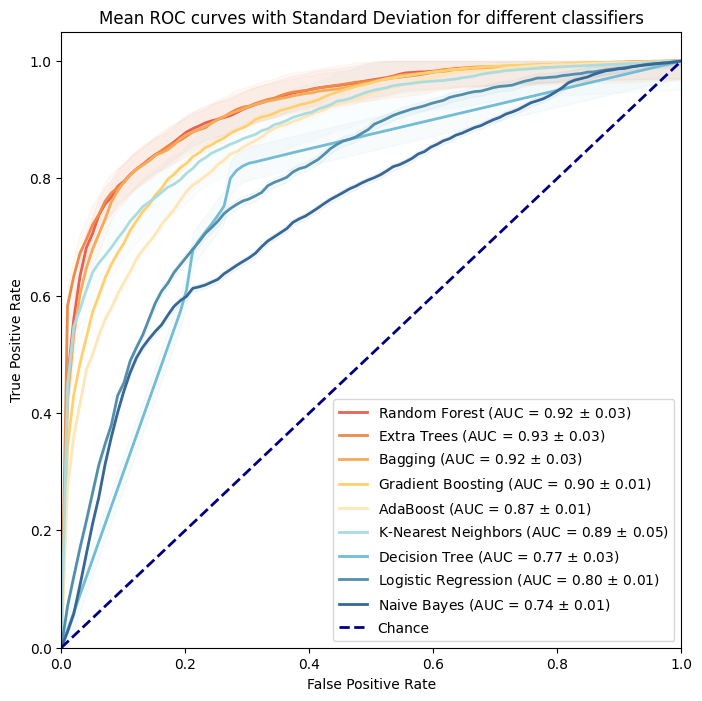

Fold 1: 0.7477
Fold 2: 0.7495
Fold 3: 0.7465
Fold 4: 0.7333
Fold 5: 0.7452


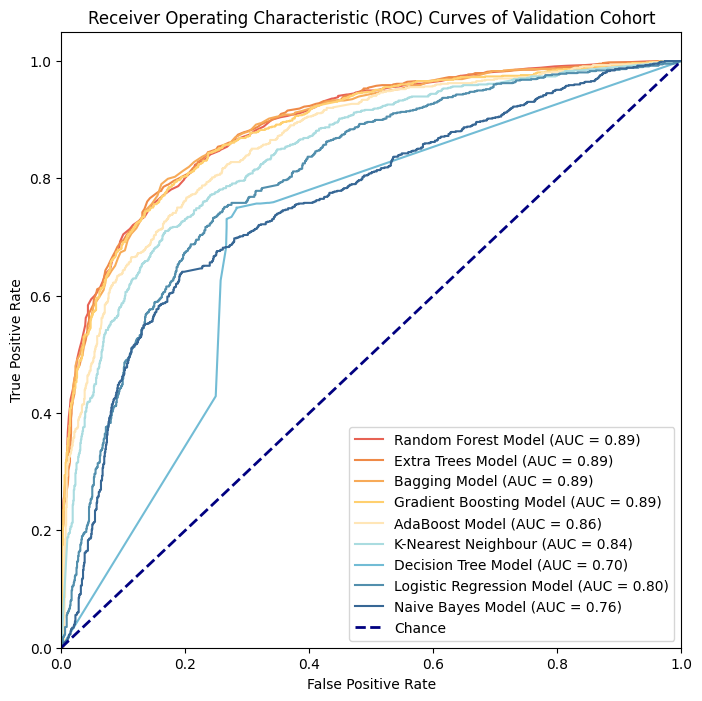

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

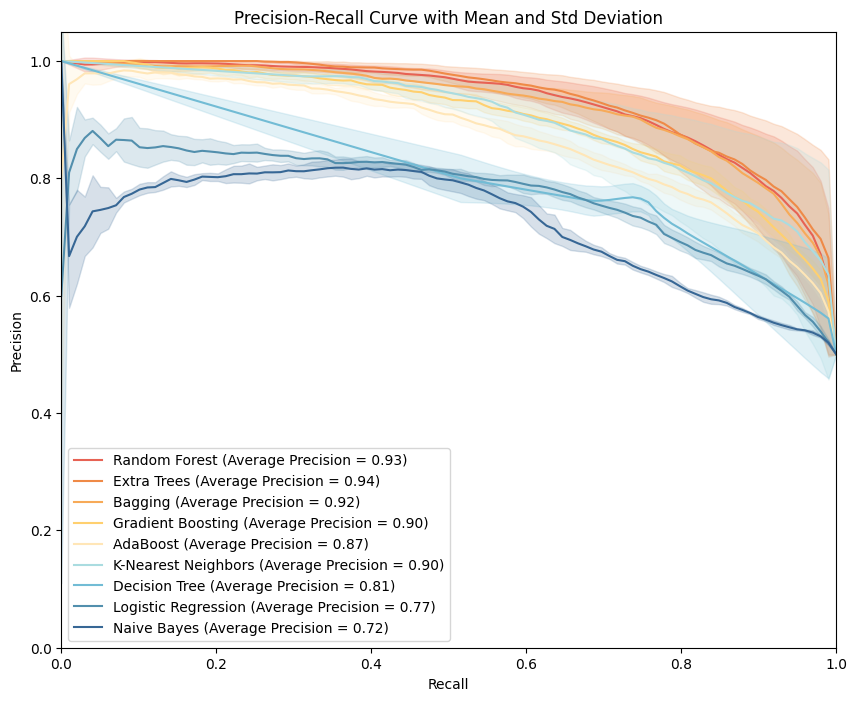

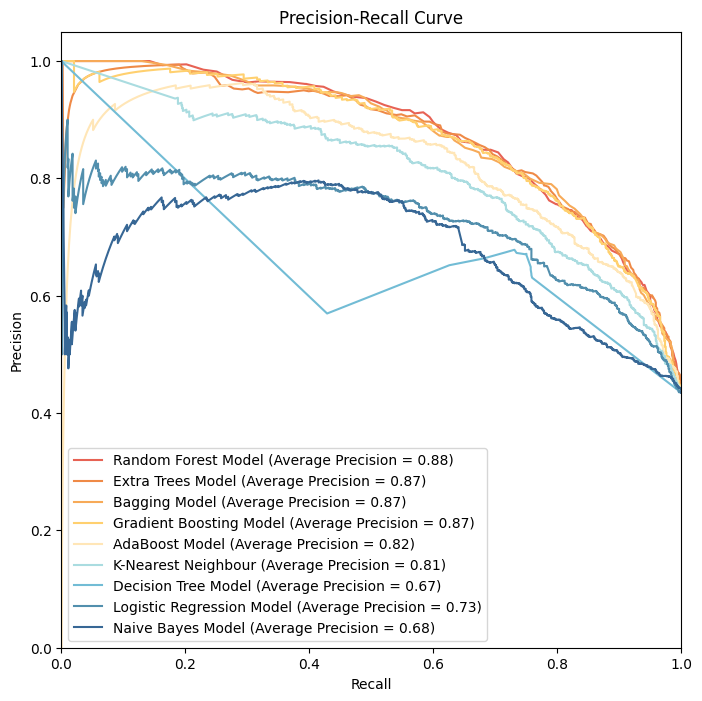

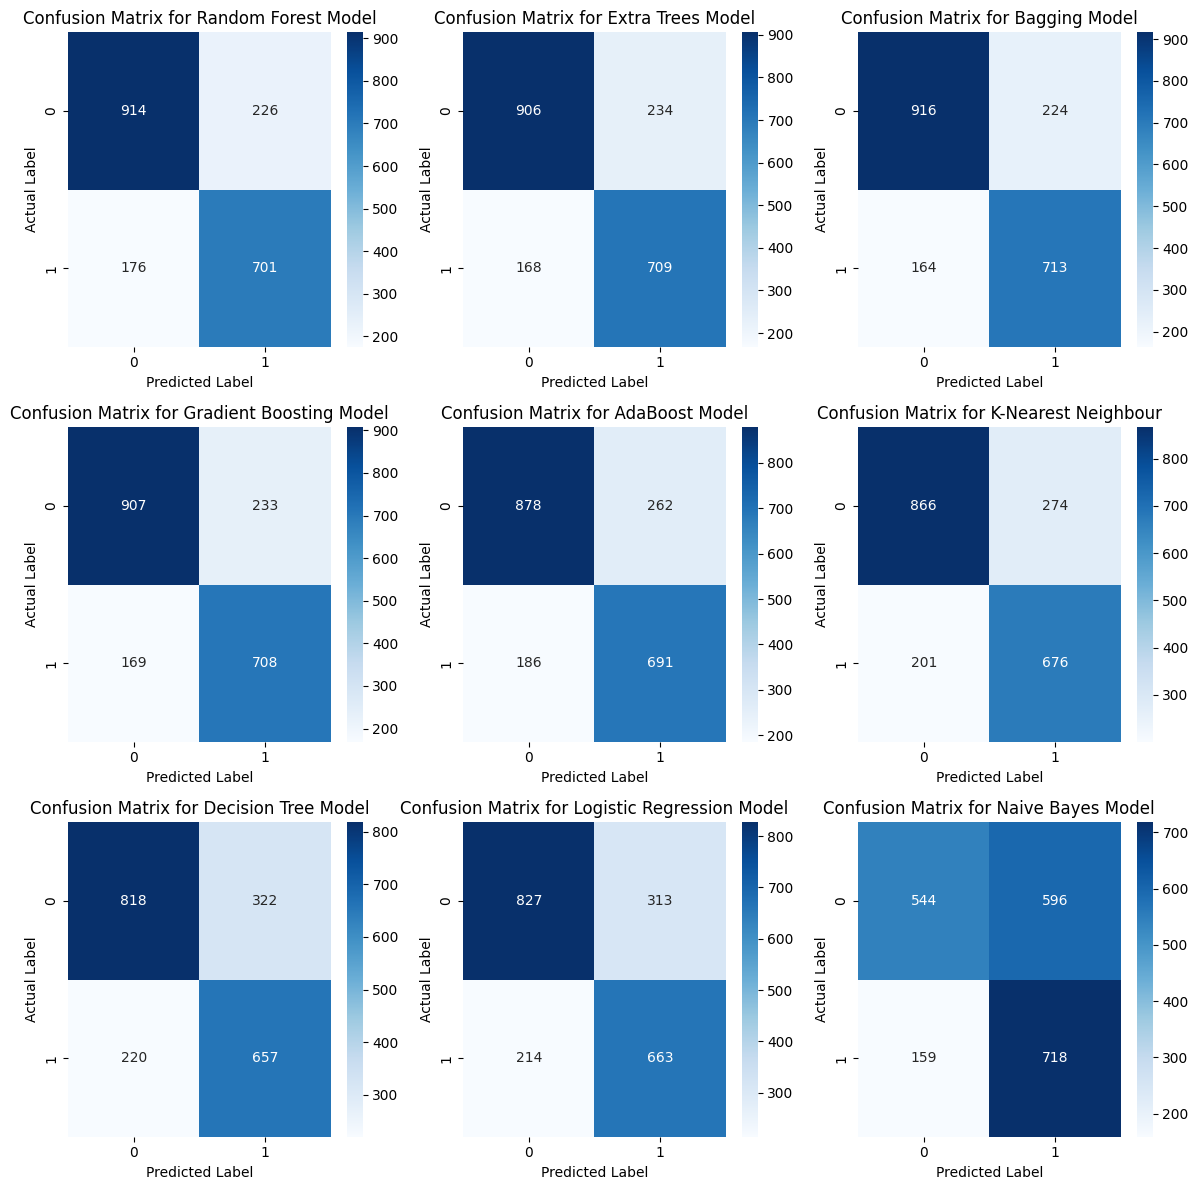

            model_name  f1_score  accuracy  precision    recall  specificity
0        Random Forest  0.838303  0.837950   0.830963  0.849050     0.826849
1          Extra Trees  0.832543  0.833995   0.834969  0.835212     0.832777
2              Bagging  0.836910  0.835862   0.826517  0.851026     0.820696
3    Gradient Boosting  0.813569  0.811689   0.805858  0.822238     0.801140
4             AdaBoost  0.789213  0.786639   0.780300  0.798726     0.774553
5  K-Nearest Neighbors  0.803713  0.797629   0.775451  0.837184     0.758070
6        Decision Tree  0.784852  0.781369   0.767486  0.807962     0.754776
7  Logistic Regression  0.735196  0.734782   0.734661  0.736317     0.733242
8          Naive Bayes  0.695493  0.646232   0.610574  0.807956     0.484507


In [176]:
# COMBINATION OF MULTIPLE MACHINE LEARNING MODELS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import joblib

# Assuming X and y are already defined and preprocessed
# X = ... # Your features
# y = ... # Your target variable

# def train_model(classifier, X_train, y_train):
#     classifier.fit(X_train, y_train)
# def evaluate_model(classifier, X_test, y_test):
#     y_pred = classifier.predict(X_test)
#     y_proba = classifier.predict_proba(X_test)[:, 1]

#     fpr, tpr, _ = roc_curve(y_test, y_proba)
#     roc_auc = auc(fpr, tpr)

#     cm = confusion_matrix(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()
#     specificity = tn / (tn + fp)
#     tpr = tp / (tp + fn)  # Calculate true positive rate

#     return {
#         'roc_auc': roc_auc,
#         'confusion_matrix': cm,
#         'precision': precision,
#         'recall': recall,
#         'f1': f1,
#         'accuracy': accuracy,
#         'specificity': specificity,
#         'tpr': tpr  # Include true positive rate in the results dictionary
#     }


# def plot_confusion_matrix(cm, clf_name):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'Confusion Matrix for {clf_name}')
#     plt.ylabel('Actual Label')
#     plt.xlabel('Predicted Label')
#     plt.show()

# def plot_roc_curve(mean_fpr, mean_tpr, mean_auc, std_auc, clf_name):
#     plt.plot(mean_fpr, mean_tpr, label=f"{clf_name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2)

# def plot_precision_recall_curve(mean_precision, mean_precision_curve, std_precision_curve, pr_auc, clf_name):
#     plt.plot(mean_precision, mean_precision_curve, label=f'{clf_name} (AUC = {pr_auc:.2f})')
#     plt.fill_between(mean_precision, mean_precision_curve - std_precision_curve, mean_precision_curve + std_precision_curve, alpha=0.2)

n_splits = 5  # Set the number of splits for cross-validation
cv = StratifiedKFold(n_splits=n_splits)
colors = ['#E76254', '#EF8A47', '#F7AA58', '#FFD06F', '#FFE6B7', '#AADCE0', '#72BCD5', '#528FAD', '#376795'] # ", '#1E466E'", Colors for the precision-recall curves
# Initialize dictionary to store trained models
trained_models = {}
# Initialize lists to store metrics
roc_curves = {}
mean_fpr = np.linspace(0, 1, 100)
storage = pd.DataFrame(columns=['model_name','f1_score', 'accuracy', 'precision', 'recall', 'specificity'])
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(max_depth= None, n_estimators= 100),
    'Extra Trees': ExtraTreesClassifier(max_depth= None, n_estimators= 200),
    'Bagging': BaggingClassifier(max_samples= 1.0, n_estimators= 100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 200),
    'AdaBoost': AdaBoostClassifier(learning_rate= 1.0, n_estimators= 100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors= 10, weights= 'distance'),
    'Decision Tree': DecisionTreeClassifier(max_depth= 20),
    'Logistic Regression': LogisticRegression(C= 1.0,solver='liblinear', penalty='l1'),
    'Naive Bayes': GaussianNB()
    #'XGB': GradientBoostingClassifier()
}

for clf_name, classifier in classifiers.items():
    tprs, aucs = [], []
    AUC_collection = pd.Series(dtype=float)
    f1_scores = []
    accuracies = []
    precisions = []
    recalls = []
    specificities = []
    for fold, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X.iloc[train], y[train])
      y_pred = classifier.predict(X.iloc[test])
      y_proba = classifier.predict_proba(X.iloc[test])[:, 1]

      # Compute ROC curve and AUC
      fpr, tpr, _ = roc_curve(y[test], y_proba)
      roc_auc = auc(fpr, tpr)
      interp_tpr = np.interp(mean_fpr, fpr, tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(roc_auc)

      # Store AUC in Series
      AUC_collection[f'Fold {fold+1}'] = roc_auc

      # Compute other metrics
      f1_scores.append(f1_score(y[test], y_pred))
      accuracies.append(accuracy_score(y[test], y_pred))
      precisions.append(precision_score(y[test], y_pred))
      recalls.append(recall_score(y[test], y_pred))
      tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
      specificity = tn / (tn+fp)
      specificities.append(specificity)

    # Save the trained model to a file with a unique name based on the classifier name
    model_filename = f"{clf_name.replace(' ', '_')}_model_trained.joblib"
    joblib.dump(classifier, model_filename)
    trained_models[clf_name] = model_filename
    print(f"",model_filename, "has been successufully saved!")

    # Print AUC collection
    print(f"The model fabricated is ",classifier,"\n")
    print(f"the AUC collection of ", classifier, "in the training cohort is shown as follws:\n",AUC_collection)

    # # Print Confusion Matrix
    # print(f"the confusion matrix of the model, ",classifier, ", is as follows:\n")
    # # Display the confusion matrix for the last fold
    # cm = confusion_matrix(y[test], y_pred)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'The Confusion Matrix for the Last Fold; Model: {clf_name}')
    # plt.ylabel('Actual Label')
    # plt.xlabel('Predicted Label')
    # plt.show()

    # # Print the metrics
    # print(f'Mean F1 Score: {np.mean(f1_scores)}')
    # print(f'Mean Accuracy: {np.mean(accuracies)}')
    # print(f'Mean Precision: {np.mean(precisions)}')
    # print(f'Mean Recall: {np.mean(recalls)}')
    # print(f'Mean Specificity: {np.mean(specificities)}')
    # Assuming f1_scores, accuracies, precisions, recalls, and specificities are defined and calculated
    metrics_data = {
        'model_name':clf_name,
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'specificity': np.mean(specificities)
    }

    # Create a new DataFrame with the metrics
    new_row = pd.DataFrame(metrics_data, index=[0])

    # Append the new row to the 'storage' DataFrame
    storage = pd.concat([storage, new_row], ignore_index=True)

    # Compute mean ROC curve and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    roc_curves[clf_name] = (mean_fpr, mean_tpr, mean_auc, std_auc)



plt.figure(figsize=(8, 8))
for (clf_name, (fpr, tpr, auc_val, std_auc)), color in zip(roc_curves.items(), colors):
    plt.plot(fpr, tpr, color=color, label=f"{clf_name} (AUC = {auc_val:.2f} $\pm$ {std_auc:.2f})", lw=2)
    # Fill between the standard deviations for each curve
    tprs_upper = np.minimum(tpr + std_auc, 1)
    tprs_lower = np.maximum(tpr - std_auc, 0)
    plt.fill_between(fpr, tprs_lower, tprs_upper, color=color, alpha=0.05)
# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC curves with Standard Deviation for different classifiers')
plt.legend(loc='lower right')
plt.show()

# Print AUC collection
for clf_name, auc_series in AUC_collection.items():
    print(f"{clf_name}: {auc_series:.4f}")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

# Model files and labels
models = {
    #'KNN_model_trained.joblib': 'Neural Network Model',
    'Random_Forest_model_trained.joblib': 'Random Forest Model',
    'Extra_Trees_model_trained.joblib': 'Extra Trees Model',
    'Bagging_model_trained.joblib': 'Bagging Model',
    'Gradient_Boosting_model_trained.joblib': 'Gradient Boosting Model',
    'AdaBoost_model_trained.joblib': 'AdaBoost Model',
    'K-Nearest_Neighbors_model_trained.joblib': 'K-Nearest Neighbour',
    'Decision_Tree_model_trained.joblib': 'Decision Tree Model',
    'Logistic_Regression_model_trained.joblib': 'Logistic Regression Model',
    # 'SVM_model_trained.joblib': 'Support Vector Machine',
    'Naive_Bayes_model_trained.joblib': 'Naive Bayes Model',
    #'XGB_model_trained.joblib': 'XGB'
}

# Assuming you have the true labels and the test features
true_labels = y_val
test_features = X_val

# Initialize plot
plt.figure(figsize=(8, 8))

# Loop through models, predict, compute ROC curve, AUC, and plot
for (model_file, label), color in zip(models.items(), colors):
    model = joblib.load(model_file)
    proba = model.predict_proba(test_features)[:, 1]
    fpr, tpr, _ = roc_curve(true_labels, proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {auc_score:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves of Validation Cohort')
plt.legend(loc='lower right')
plt.show()

# Initialize lists to store precision-recall curves
pr_curves = {}

for clf_name, classifier in classifiers.items():
    precisions, recalls = [], []
    mean_precision = np.linspace(0, 1, 100)

    for train, test in cv.split(X, y):
        classifier.fit(X.iloc[train], y[train])
        y_proba = classifier.predict_proba(X.iloc[test])[:, 1]

        # Compute Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y[test], y_proba)
        pr_curves.setdefault(clf_name, []).append((precision, recall))

# Plot Precision-Recall curves with mean and std
plt.figure(figsize=(10, 8))

for (clf_name, curves), color in zip(pr_curves.items(),colors):
    # Interpolate all precision-recall curves to a common recall scale
    interp_precisions = [np.interp(mean_precision, np.flipud(r), np.flipud(p)) for p, r in curves]
    # Calculate mean and std of precision
    mean_precision_curve = np.mean(interp_precisions, axis=0)
    std_precision_curve = np.std(interp_precisions, axis=0)
    # Calculate AUC
    pr_auc = auc(mean_precision, mean_precision_curve)
    # Plot the mean precision-recall curve
    plt.plot(mean_precision, mean_precision_curve, color=color, label=f'{clf_name} (Average Precision = {pr_auc:.2f})')
    # Plot the std deviation area
    plt.fill_between(mean_precision, mean_precision_curve - std_precision_curve, mean_precision_curve + std_precision_curve,color=color, alpha=0.2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Mean and Std Deviation')
plt.legend(loc='lower left')
plt.show()

# Assuming you have the true labels and the test features
true_labels = y_val
test_features = X_val

# Initialize plot
plt.figure(figsize=(8, 8))

# Loop through models, predict, compute precision-recall curve, AUC, and plot
for (model_file, label), color in zip(models.items(), colors):
    model = joblib.load(model_file)
    proba = model.predict_proba(test_features)[:, 1]
    precision, recall, _ = precision_recall_curve(true_labels, proba)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, color=color, label=f'{label} (Average Precision = {auc_score:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# Number of models
# num_models = len(models)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Loop through models and plot confusion matrix for each
for ax, (model_file, label) in zip(axes.flatten(), models.items()):
    model = joblib.load(model_file)
    y_pred = model.predict(test_features)
    cm = confusion_matrix(true_labels, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {label}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')

# Adjust layout
plt.tight_layout()
plt.show()

print(storage)
# # Create a figure and a 3x3 grid of subplots
# fig, axs = plt.subplots(3, 3, figsize=(9, 9))

# # Iterate over each subplot and fill it with content
# print(f"the confusion matrix of the model, ",classifier, ", is as follows:\n")
# for i in range(3):
#     for j in range(3):
#         # Display the confusion matrix in the validation cohort
#         cm = confusion_matrix(y_val, y_pred)
#         # plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#         plt.title(f'The Confusion Matrix for the Last Fold; Model: {clf_name}')
#         plt.ylabel('Actual Label')
#         plt.xlabel('Predicted Label')
#         plt.show()
#         axs[i, j].plot([0, 1], [0, (i+1)*(j+1)])  # Example plot
#         axs[i, j].set_title(f'Plot ({i+1},{j+1})')  # Set title for each subplot

# # Adjust the layout
# plt.tight_layout()

# # Display the plot
# plt.show()

In [177]:
y_val.value_counts()

pneumonia
0    1140
1     877
Name: count, dtype: int64

In [69]:
storage

,model_name,f1_score,accuracy,precision,recall,specificity
0,Random Forest,0.953869,0.951852,0.915569,0.995548,0.908155
1,Extra Trees,0.980215,0.979953,0.966735,0.994178,0.965731
2,Bagging,0.950364,0.948253,0.912934,0.991094,0.905414
3,Gradient Boosting,0.828623,0.826252,0.816891,0.840998,0.811513
4,AdaBoost,0.772605,0.776903,0.787474,0.758401,0.795404
5,K-Nearest Neighbors,0.852185,0.840475,0.793718,0.920158,0.760791
6,Decision Tree,0.926016,0.920321,0.864925,0.996575,0.844067
7,Logistic Regression,0.707368,0.730638,0.774458,0.651482,0.809799
8,Naive Bayes,0.646315,0.694484,0.766814,0.558945,0.830018
